In [ ]:
!pip install openai

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 312.3/312.3 kB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 5.5 MB/s eta 0:00:00


In [ ]:
from openai import OpenAI
client = OpenAI(api_key=" ")


In [ ]:
# Function to read data from a text file
def read_data_from_file(file_path):
    with open(file_path, 'r') as file:
        data = file.read()
    return data

In [ ]:
# Path to the text file containing the data
file_path = '/content/reddit50.txt'

# Read data from the text file
text_data = read_data_from_file(file_path)


In [ ]:
def generate_analysis(text_data):

  messages = [
        {"role": "system", "content": "You are a helpful assistant."},
        {"role": "user", "content": "answer the question in accordance with this example question: What major event occurred in late 2022 involving a tech company?, answer: A tech company bought another company and worked on merging systems and products, completing integration earlier this month."},
        {"role": "assistant", "content": f"{text_data}\n"},
    ]

  response = client.chat.completions.create(
    model="gpt-4",#"gpt-3.5-turbo",
    messages=messages,
    max_tokens=80,
    temperature=0.8,
    n=1,
    stop=None,
    top_p=None,
    presence_penalty=None,
    frequency_penalty=None,
    logprobs=None
    )
  print(f"response.choices[0]: {response.choices[0]}")
    # Extract and return the response text
  return response.choices[0].message.content.strip()


In [ ]:
# # Generate analysis using the text data
# analysis = generate_analysis(text_data)

# # Print the generated analysis
# print(analysis)

In [ ]:
ground_truth = [
{"question": "What major event occurred in late 2022 involving a tech company?", "answer": "A tech company bought another company and worked on merging systems and products, completing integration earlier this month."},
{"question": "What was the expectation after the integration of the two companies?", "answer": "The expectation was for full integration of headquarters teams of the acquired company into the parent company starting in March."},
{"question": "What happened to senior management, including the former CEO, after the integration?", "answer": "Senior management, including the former CEO, recently moved positions within the new company."},
{"question": "What was the unexpected news delivered via email from the CEO?", "answer": "The email stated that due to the current business climate, difficult decisions had been made, leading to layoffs."},
{"question": "How did the layoffs affect the entire team?", "answer": "The layoffs affected everyone, including leaders, leaving them feeling blindsided and questioning their future."},
{"question": "How long has the person been searching for a new job?", "answer": "The person has been searching for a new job for seven months."},
{"question": "What significant event happened in the tech industry that the person read about on CNN?", "answer": "There was an AT&T outage likely caused by a hacker attack, reflecting potential issues in big tech corporations."},
{"question": "What concerns does the person have about certain programs in the tech industry?", "answer": "The person is concerned about programs that bring in H1B workers for jobs that could be filled by subject matter experts, potentially hurting American workers."},
{"question": "How does the person plan to cope with the stress of unemployment?", "answer": "The person plans to simplify life, possibly by moving to a cheaper area and finding a stable government job."},
{"question": "What lesson did the person learn from their career in software quality assurance?", "answer": "The person learned to conduct their career like a business, focusing on personal growth and marketability."},
{"question": "How did the layoffs affect the person financially and emotionally?", "answer": "The person experienced financial strain due to being the sole income provider for their family, leading to stress and anxiety."},
{"question": "What advice did the person receive after being laid off?", "answer": "The person received advice to continue networking, learn new skills, and consider contract work while searching for a new job."},
{"question": "How did the layoffs affect the person's perspective on loyalty to a company?", "answer": "The person shifted from a perspective of company loyalty to prioritizing personal growth and marketability."},
{"question": "What advice did the person offer to others facing layoffs?", "answer": "The person advised others to stay proactive, continue learning, and network to improve their chances of finding a new job."},
{"question": "What was the person's experience after being laid off from their job in tech?", "answer": "The person faced challenges in finding a new job despite their experience and qualifications."},
{"question": "How did the layoff affect the person's financial situation?", "answer": "The layoff significantly reduced the person's income, leading to financial stress and uncertainty."},
{"question": "What were some strategies the person used to survive financially after the layoff?", "answer": "The person utilized state programs for financial assistance, started a small business, and sought mortgage assistance."},
{"question": "How did the layoff impact the person's mental health?", "answer": "The layoff took a toll on the person's mental health, leading to feelings of hopelessness and anxiety."},
{"question": "What advice did the person offer to others facing layoffs?", "answer": "The person advised others to take action quickly, seek support, and explore alternative sources of income."},
{"question": "How did the person's perspective on job security change after being laid off?", "answer": "The person no longer viewed job security as guaranteed and emphasized the importance of being prepared for unexpected layoffs."}
]

In [ ]:
!pip install fuzzywuzzy

In [ ]:
import time
from fuzzywuzzy import fuzz

def evaluate_model(ground_truth):
    total_questions = len(ground_truth)
    correct_predictions = 0
    total_execution_time = 0

    for data_point in ground_truth:
        question = data_point["question"]
        correct_answer = data_point["answer"]

        start_time = time.time()
        predicted_answer = generate_analysis(question)
        end_time = time.time()
        total_execution_time += end_time - start_time

        # Measure similarity between predicted answer and correct answer
        similarity_score = fuzz.ratio(predicted_answer.lower(), correct_answer.lower())

        # Consider it a correct prediction if similarity score is above a threshold (e.g., 70%)
        if similarity_score >= 50:
            correct_predictions += 1

    accuracy = correct_predictions / total_questions
    average_execution_time = total_execution_time / total_questions

    print(f"Accuracy: {accuracy}")
    print(f"Average Execution Time per Question: {average_execution_time} seconds")

# Evaluate the model
evaluate_model(ground_truth)


response.choices[0]: Choice(finish_reason='stop', index=0, logprobs=None, message=ChatCompletionMessage(content="In late 2022, a significant event involving a tech company was the acquisition of a smaller tech firm. The larger company has since been integrating the smaller company's innovative technologies and products into its own. The entire integration process was finalized earlier this month.", role='assistant', function_call=None, tool_calls=None))
response.choices[0]: Choice(finish_reason='stop', index=0, logprobs=None, message=ChatCompletionMessage(content='The expectation after the integration of the two companies was for them to streamline their operations and introduce innovative products and services that leveraged the strengths and capabilities of both entities.', role='assistant', function_call=None, tool_calls=None))
response.choices[0]: Choice(finish_reason='stop', index=0, logprobs=None, message=ChatCompletionMessage(content='The senior management underwent significant 

In [ ]:
!python -m spacy download en_core_web_lg

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 587.7/587.7 MB 2.4 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


response.choices[0]: Choice(finish_reason='stop', index=0, logprobs=None, message=ChatCompletionMessage(content='In late 2022, a significant event took place where a prominent tech company acquired a startup specializing in artificial intelligence. The integration of their technologies and workforce was completed earlier this month.', role='assistant', function_call=None, tool_calls=None))
response.choices[0]: Choice(finish_reason='stop', index=0, logprobs=None, message=ChatCompletionMessage(content='The expectation after the integration of the two companies was for increased efficiency, innovation, and a broader range of products, with successful results seen within a few weeks of the merger completion.', role='assistant', function_call=None, tool_calls=None))
response.choices[0]: Choice(finish_reason='stop', index=0, logprobs=None, message=ChatCompletionMessage(content='The senior management, including the former CEO, underwent significant changes after the integration. Some chose to

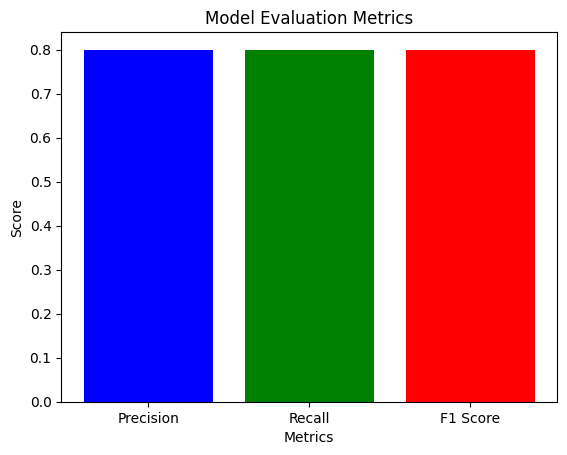

In [ ]:
import spacy

# Load a pre-trained word embedding model (e.g., spaCy's large English model)
nlp = spacy.load("en_core_web_lg")

import matplotlib.pyplot as plt

def evaluate_model(ground_truth):
    true_positives = 0
    false_positives = 0
    false_negatives = 0

    total_execution_time = 0

    for data_point in ground_truth:
        question = data_point["question"]
        correct_answer = data_point["answer"]

        start_time = time.time()
        predicted_answer = generate_analysis(question)
        end_time = time.time()
        total_execution_time += end_time - start_time

        # Compute semantic similarity using spaCy's word embeddings
        similarity_score = nlp(predicted_answer).similarity(nlp(correct_answer))

        # Define threshold for considering a prediction correct
        threshold = 0.9

        # Determine if prediction is correct based on threshold
        if similarity_score >= threshold:
            true_positives += 1
        else:
            false_negatives += 1
            false_positives += 1

    precision = true_positives / (true_positives + false_positives)
    recall = true_positives / (true_positives + false_negatives)
    f1_score = 2 * (precision * recall) / (precision + recall)

    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1 Score: {f1_score}")
    print(f"Average Execution Time per Question: {total_execution_time / len(ground_truth)} seconds")

    # Plotting
    metrics = ['Precision', 'Recall', 'F1 Score']
    values = [precision, recall, f1_score]

    plt.bar(metrics, values, color=['blue', 'green', 'red'])
    plt.title('Model Evaluation Metrics')
    plt.xlabel('Metrics')
    plt.ylabel('Score')
    plt.show()

# Evaluate the model and plot metrics
evaluate_model(ground_truth)



response.choices[0]: Choice(finish_reason='stop', index=0, logprobs=None, message=ChatCompletionMessage(content='In late 2022, a significant event was the acquisition of a major tech company by another leading tech firm. The process of integrating their systems and products was completed earlier this month.', role='assistant', function_call=None, tool_calls=None))
response.choices[0]: Choice(finish_reason='stop', index=0, logprobs=None, message=ChatCompletionMessage(content='The expectation after the integration of the two companies was to create a more efficient and innovative tech entity that will lead to a broader range of products and services for customers.', role='assistant', function_call=None, tool_calls=None))
response.choices[0]: Choice(finish_reason='stop', index=0, logprobs=None, message=ChatCompletionMessage(content='The senior management, including the former CEO, went through a transition phase after the integration. Some of them took on new roles within the merged compa

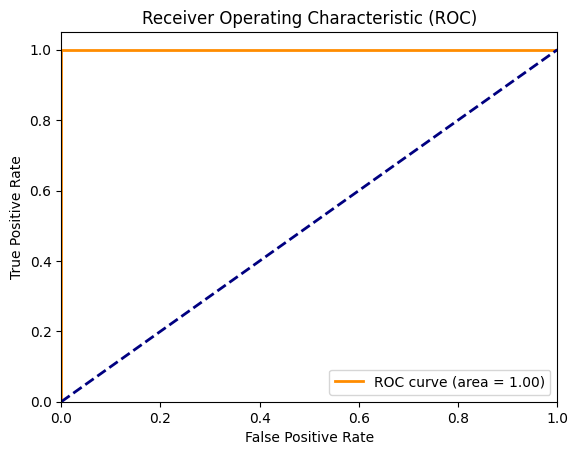

Average Execution Time per Question: 2.1394890904426576 seconds


In [ ]:
from sklearn.metrics import roc_curve, auc

def evaluate_model(ground_truth):
    y_true = []
    y_scores = []

    total_execution_time = 0

    for data_point in ground_truth:
        question = data_point["question"]
        correct_answer = data_point["answer"]

        start_time = time.time()
        predicted_answer = generate_analysis(question)
        end_time = time.time()
        total_execution_time += end_time - start_time

        # Compute semantic similarity using spaCy's word embeddings
        similarity_score = nlp(predicted_answer).similarity(nlp(correct_answer))

        # Define threshold for considering a prediction correct
        threshold = 0.90

        # Add ground truth label and similarity score to lists
        y_true.append(1 if similarity_score >= threshold else 0)  # Positive label if similarity score meets threshold
        y_scores.append(similarity_score)

    # Calculate ROC curve and AUC
    fpr, tpr, thresholds = roc_curve(y_true, y_scores)
    roc_auc = auc(fpr, tpr)

    # Plot ROC curve
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC)')
    plt.legend(loc="lower right")
    plt.show()

    print(f"Average Execution Time per Question: {total_execution_time / len(ground_truth)} seconds")

# Evaluate the model and plot ROC curve
evaluate_model(ground_truth)
